In [1]:
import torch
import torch.nn.functional as F 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
len(words)

32033

In [14]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
vocab_size = len(itos)

In [72]:
n_embd = 10         # dimensionality of char embedding vetors
n_hidden = 200      # no. of neurons in hidden layer
block_size = 3

g = torch.Generator().manual_seed(2347483647)

C = torch.randn((vocab_size, n_embd), generator=g)
w1 = torch.randn((block_size * n_embd, n_hidden), generator=g) * 0.2
b1 = torch.randn(n_hidden, generator=g) * 0.01
w2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.1
b2 = torch.randn(vocab_size, generator=g) * 0
params = [C, w1, b1, w2, b2]
for p in params:
  p.requires_grad = True

In [5]:
sum(p.nelement() for p in params)  # total params

11897

In [6]:
import random

In [7]:
def build_dataset(words):
  block_size = 3     
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]  
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

random.seed(47)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182501, 3]) torch.Size([182501])
torch.Size([22802, 3]) torch.Size([22802])
torch.Size([22843, 3]) torch.Size([22843])


In [73]:
batch_size = 32
max_steps = 10000

for i in range(max_steps):
  # mini batch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix]

  emb = C[Xb]                         # shape -> (N, 30)
  embcat = emb.view(emb.shape[0], -1) 
  hpreact = embcat @ w1 + b1          # hidden layer pre activation
  h = torch.tanh(hpreact)             # hidden layer
  logits = h @ w2 + b2                # O/P layer
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in params:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 5000 else 0.01
  for p in params:
    p.data += -lr * p.grad

  if i % 500 == 0:
    print(f'{i:7d}: {loss.item():.4f}')

print(loss.item())

      0: 3.5601
    500: 2.7278
   1000: 2.3073
   1500: 2.3186
   2000: 2.0681
   2500: 2.3932
   3000: 2.1914
   3500: 2.0647
   4000: 2.3278
   4500: 2.3984
   5000: 2.5512
   5500: 2.2934
   6000: 2.2592
   6500: 1.8874
   7000: 2.3408
   7500: 2.3487
   8000: 2.0212
   8500: 2.1544
   9000: 2.0512
   9500: 2.1715
1.9403417110443115


(array([2124.,  154.,  102.,   61.,   61.,   47.,   44.,   54.,   46.,
          30.,   29.,   34.,   22.,   29.,   20.,   39.,   30.,   18.,
          24.,   32.,   11.,   32.,   26.,   22.,   15.,   32.,   18.,
          20.,   17.,   17.,   14.,   20.,   25.,   31.,   19.,   22.,
          29.,   27.,   20.,   30.,   36.,   40.,   37.,   44.,   60.,
          58.,   92.,  118.,  206., 2262.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <BarContainer object of 50 artists>)

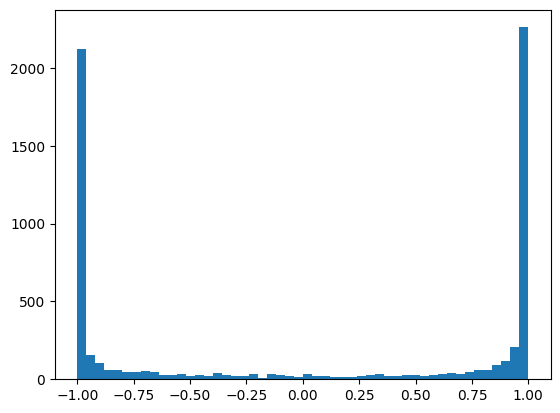

In [56]:
plt.hist(h.view(-1).tolist(), 50)

(array([159., 201., 163., 168., 132., 139., 152., 143., 139., 108., 109.,
        106.,  89.,  94.,  97., 126., 115., 101., 128., 111., 121.,  89.,
        132., 116., 108., 107., 103.,  78., 122.,  95., 100.,  93., 116.,
        105., 155., 127., 105., 150., 123., 113., 150., 122., 119., 145.,
        166., 163., 131., 202., 182., 182.]),
 array([-9.99179363e-01, -9.59220723e-01, -9.19262083e-01, -8.79303442e-01,
        -8.39344802e-01, -7.99386162e-01, -7.59427521e-01, -7.19468881e-01,
        -6.79510241e-01, -6.39551600e-01, -5.99592960e-01, -5.59634320e-01,
        -5.19675679e-01, -4.79717039e-01, -4.39758399e-01, -3.99799758e-01,
        -3.59841118e-01, -3.19882478e-01, -2.79923837e-01, -2.39965197e-01,
        -2.00006557e-01, -1.60047916e-01, -1.20089276e-01, -8.01306355e-02,
        -4.01719952e-02, -2.13354826e-04,  3.97452855e-02,  7.97039258e-02,
         1.19662566e-01,  1.59621207e-01,  1.99579847e-01,  2.39538487e-01,
         2.79497128e-01,  3.19455768e-01,  3.59414

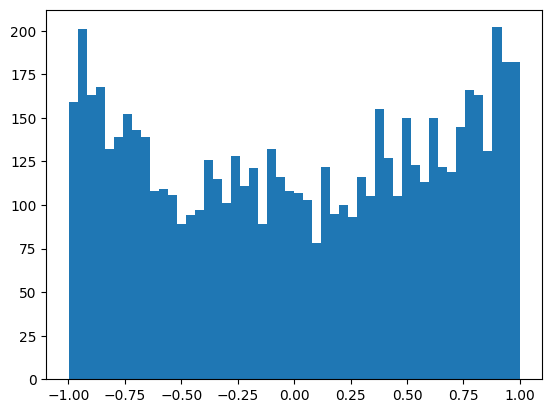

In [67]:
plt.hist(h.view(-1).tolist(), 50)

(array([  3.,   2.,   2.,   1.,   3.,   1.,   4.,   9.,   7.,  27.,  22.,
         21.,  60.,  57., 118., 112., 137., 164., 186., 255., 284., 276.,
        288., 397., 404., 428., 365., 361., 420., 344., 326., 229., 249.,
        181., 139., 140., 115.,  65.,  53.,  36.,  36.,  20.,  22.,  14.,
          8.,   4.,   3.,   1.,   0.,   1.]),
 array([-3.8990972 , -3.74732246, -3.59554771, -3.44377297, -3.29199822,
        -3.14022348, -2.98844873, -2.83667399, -2.68489924, -2.5331245 ,
        -2.38134975, -2.22957501, -2.07780026, -1.92602552, -1.77425077,
        -1.62247603, -1.47070128, -1.31892654, -1.16715179, -1.01537705,
        -0.8636023 , -0.71182756, -0.56005281, -0.40827807, -0.25650332,
        -0.10472858,  0.04704617,  0.19882091,  0.35059566,  0.5023704 ,
         0.65414515,  0.80591989,  0.95769464,  1.10946938,  1.26124413,
         1.41301887,  1.56479362,  1.71656836,  1.86834311,  2.02011785,
         2.1718926 ,  2.32366734,  2.47544209,  2.62721683,  2.77899158,
 

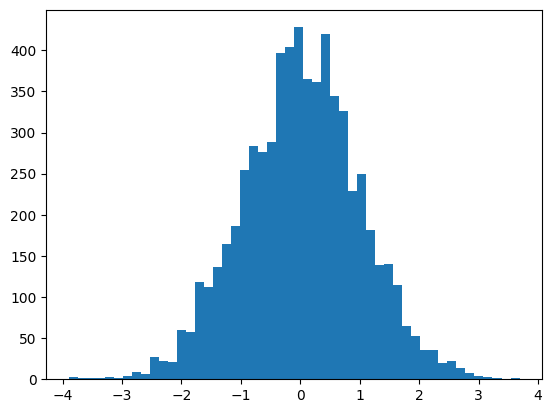

In [68]:
plt.hist(hpreact.view(-1).tolist(), 50)

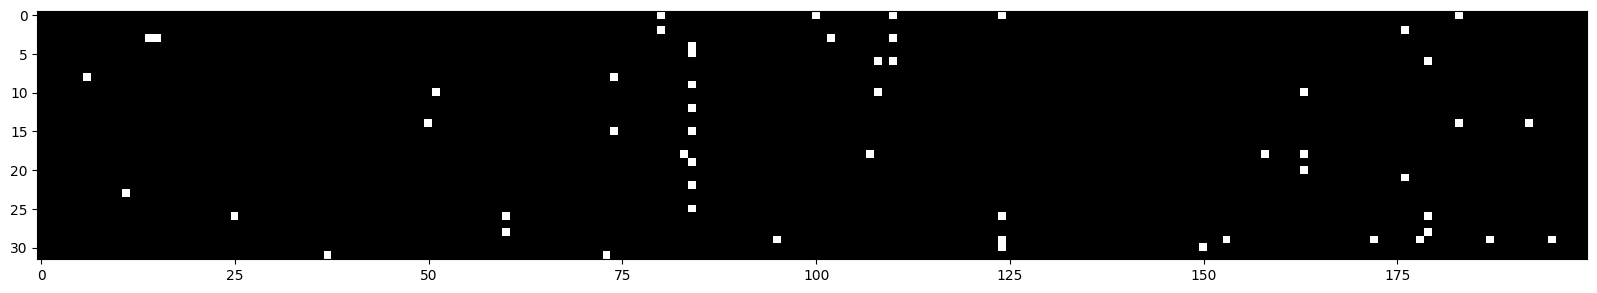

In [71]:
plt.figure(figsize=(20,10))
# white -> true
# because at the head and tail of tanh the values do not change remain -1, 1
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation='nearest')

In [76]:
@torch.no_grad()          # disables gradient tracking
def split_loss(split):
  x, y = {
    'train' : (Xtr, Ytr),
    'val' : (Xdev, Ydev),
    'test' : (Xte, Yte),
  }[split]

  emb = C[x]        # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1)     # change to (N, block_size * n_embd)
  h = torch.tanh(embcat @ w1 + b1 )           
  logits = h @ w2 + b2           
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.2100830078125
val 2.2160160541534424


In [75]:
# sampling
g = torch.Generator().manual_seed(2347483647 + 10)

for _ in range(10): 
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]    # (1, block_size, n_embd)
    h = torch.tanh(emb.view(1, -1) @ w1 + b1)
    logits = h @ w2 + b2
    probs = F.softmax(logits, dim=1)
    # sampling from the probs to get the index
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

klaex.
ty.
maksi.
sazaud.
arael.
avio.
jolda.
ehndoarilio.
sahainc.
wild.


Optimizations:
- this should be our start loss
- but we are starting at around 23 loss, so need to find better initialization
- logits should be very small so we change w2, b2
- our h has many -1 and 1
- hpreact should be around 0 but ours is spread out
- and h values should be more inbetween the curve so that the neurons learn
- if full white column then dead neuron
- so we change w1 and b1

In [27]:
-torch.tensor(1/27.0).log()

tensor(3.2958)